# SVM
SVM tries to create a hyperplane that spans across the all the dimensions. The model formula is written the same way as we have used in the past.

The **kernel** option tells the function the type of hyperplane you want to fit. It can be something simple as linear or more complex as polynomial

The **cost** option tells the function the penalty it should give for violoation ( a point present in the wrong side of the plane). So a high value will force a plane that is narrower and a low value will have a wider range.

The **probability** option is asking the resulting model to be used for providing probabilities.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Load the data

In [2]:
data = pd.read_csv("all.15k.patients.txt",sep = "\t")
data.head()

,dateofbirth,maritalstatus,race,ageatdiagnosis,alivestatus,survivaltime,grade,nodesexam,nodespos,extent,nodalstatus,size,pgr,er
pid00001,28/01/1932,5,2,61,0,110,3,32,3,10,6,60,2,2
pid00002,07/05/1934,2,3,60,0,100,2,13,1,10,6,15,1,1
pid00003,14/04/1921,5,3,76,0,70,3,8,0,10,0,8,1,1
pid00004,08/11/1931,3,3,61,1,31,3,20,0,10,0,10,2,2
pid00005,08/01/1922,2,3,74,1,47,2,16,8,10,6,15,2,1


### Separate training and test dataset

In [3]:
X = np.array(data[["grade","nodespos","nodesexam","size","pgr","er"]])
y = np.array(data["alivestatus"])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)

### Build the model

In [4]:
# this could take ~5 minutes to run
clf = SVC(C=10, kernel='linear',probability = True)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Testing the model

We can use the **predict** method to determine results of the data provided. 

In [5]:
res = clf.predict(X_test)

confusion_matrix(y_test, res)

array([[4049,   57],
       [ 771,  123]])

#### Calculate AUC

In [6]:
print("AUC score for the test set:",roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

AUC score for the test set: 0.7808386755454723


<IPython.core.display.Javascript object>


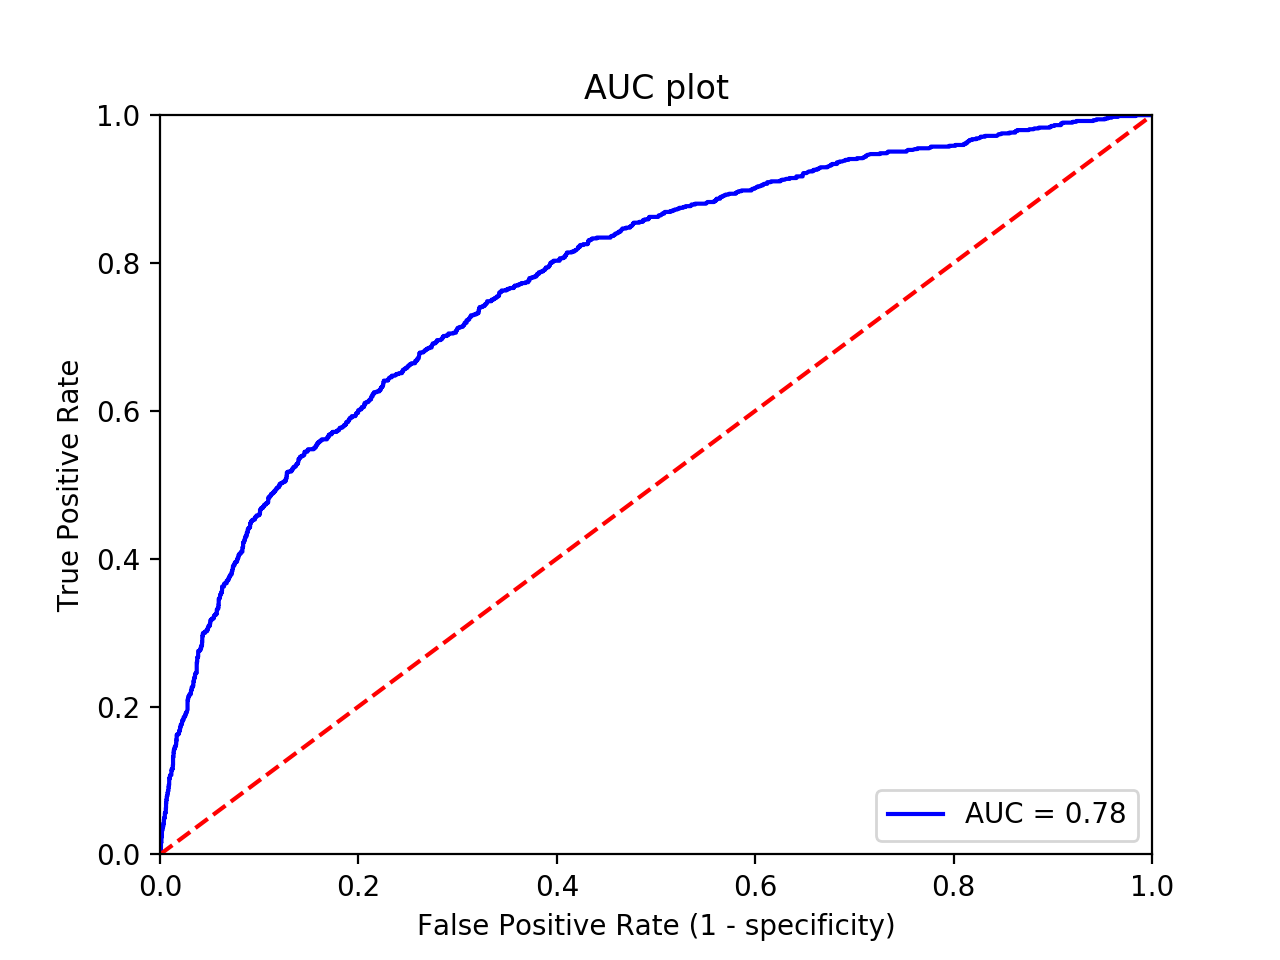

In [7]:
%matplotlib notebook
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.figure()

plt.title('AUC plot')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.show()

## Let’s try to change the cost function and see if it helps the model. 
## Let’s change the cost to 1.

In [8]:
# this could take ~5 minutes to run
clf2 = SVC(C=1, kernel='linear',probability = True)
clf2.fit(X_train, y_train)

# predict the probability, and calculate auc score
print("AUC score for the test set:",roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1]))

AUC score for the test set: 0.7807991742318492


It seems set <code>cost = 1</code> gives us similar performance as <code>cost = 10</code>